In [25]:
import numpy as np
import torch
import matplotlib.pyplot as plt

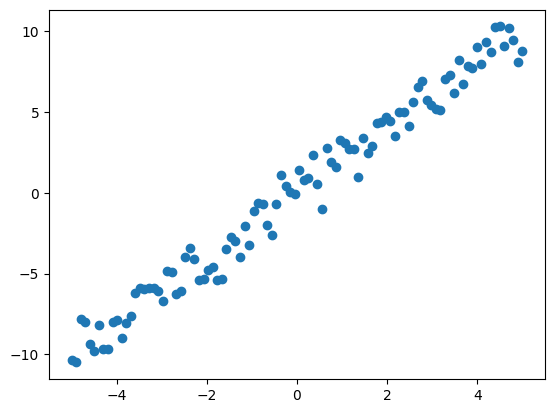

In [40]:
n = 100
x_data = torch.linspace(-5, 5, n)
nu, scale = torch.tensor(0.), torch.tensor(1.)
noise = torch.FloatTensor([torch.normal(nu, scale) for _ in range(n)])
y_data = 2 * x_data + noise
plt.scatter(x_data, y_data);

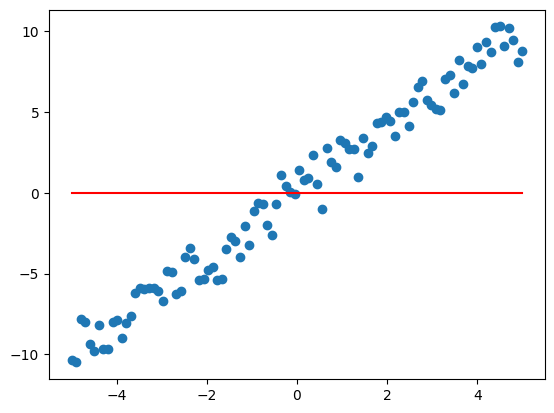

In [92]:
w = torch.tensor(0., requires_grad=True)
b = torch.tensor(0., requires_grad=True)
y_pred = w * x_data + b
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data, c='r');

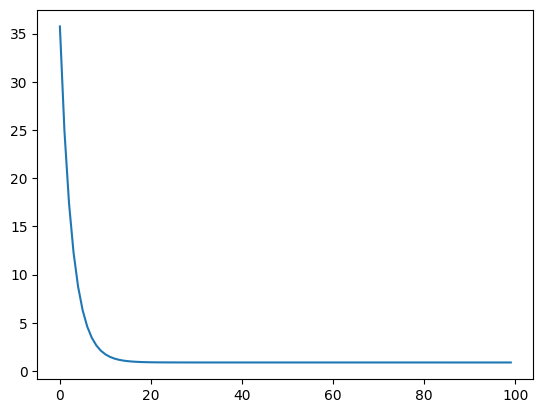

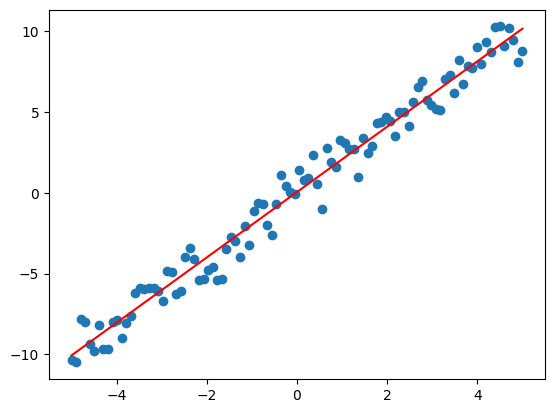

In [93]:
lr = 1e-2
step_n = 100

loss_values = []
for step in range(step_n):
    y_pred = w * x_data + b
    loss = torch.mean((y_data - y_pred) ** 2)
    loss_values.append(loss.data)
    loss.backward()

    w.data = w.data - lr * w.grad
    b.data = b.data - lr * b.grad
    w.grad.zero_()
    b.grad.zero_()
    

plt.plot(loss_values)
plt.show()
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data, c='r');
plt.show()